# Transfer Learning Maarastawi et al. 2018 - class
# Table of contents 
1. [Linear Regression](#LinearRegression)
2. [MLP (Dense)](#MLP)
3. [AE combined latent subset features](#AE_combined_subsetFeatures)
4. [AE OTU latent](#AE_latentOTU)

In [1]:
from data import *
from train_2 import *
from transfer_learning import *
from test_functions import *
from layers import *
from utils import *
from loss import *
from metric import *
from results import *
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [2]:
df_microbioma_train, df_microbioma_test, \
df_microbioma_transfer_learning_train, df_microbioma_transfer_learning_test, \
df_domain_train, df_domain_test, df_domain_transfer_learning_train, df_domain_transfer_learning_test,\
otu_columns, domain_columns = \
    read_df_with_transfer_learning_2otufiles_differentDomainFeatures(
              metadata_names=['age','Temperature','Precipitation3Days'],
              otu_filename='data/Aggregated/otu_table_Class.csv',
              metadata_filename='data/Aggregated/metadata_table_all_80.csv',
              metadata_names_transfer=['pH', 'N', 'C', 'C.N'],
              otu_transfer_filename='data/Maarastawi2018/otu_table_Class_Maarastawi2018.csv',
              metadata_transfer_filename='data/Maarastawi2018/metadata_table_Maarastawi2018.csv')

In [3]:
print(df_domain_train.shape)
print(df_domain_test.shape)
print(df_domain_transfer_learning_train.shape)
print(df_domain_transfer_learning_test.shape)

(4251, 3)
(373, 3)
(86, 4)
(37, 4)


In [4]:
print('TRAIN:')
print('pH:' + str(df_domain_transfer_learning_train.loc[:,'pH'].mean()))
print('N:' + str(df_domain_transfer_learning_train.loc[:,'N'].mean()))
print('C:' + str(df_domain_transfer_learning_train.loc[:,'C'].mean()))
    
print('TEST:')
print('pH:' + str(df_domain_transfer_learning_test.loc[:,'pH'].mean()))
print('N:' + str(df_domain_transfer_learning_test.loc[:,'N'].mean()))
print('C:' + str(df_domain_transfer_learning_test.loc[:,'C'].mean()))

TRAIN:
pH:4.941860465116278
N:0.07779069767441861
C:1.0279069767441862
TEST:
pH:4.818918918918919
N:0.0727027027027027
C:0.9551351351351353


In [5]:
df_microbioma_train

,570086,217700,849156,221349,4434837,573135,3609950,4339351,541511,1111883,...,254346,1081489,539336,226240,329490,256569,235541,556561,529793,550219
11116.I06A093.1197717,57,6,1440,401,21,2321,326,176,642,77,...,0,81,19,248,1064,3,511,301,153,126
11116.L09A088.1196780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11116.L11A084.1195839,92,6,532,483,59,2032,233,461,772,166,...,0,20,46,132,580,5,343,180,157,165
11116.L07A076.1194918,111,35,1564,332,137,1567,379,799,2780,321,...,0,25,161,616,365,2,539,61,143,148
11116.L01A070.1197015,79,0,1123,77,9,632,31,622,360,98,...,0,6,21,58,155,1,50,28,41,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116.L30A065.1196361,10,1,315,160,28,827,297,104,224,168,...,0,21,128,47,184,2,452,243,80,147
11116.A11A061.1196939,51,14,1752,1092,61,2582,342,162,1070,229,...,1,23,180,221,707,2,408,577,381,965
11116.L01A079.1194513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11116.L16A071.1195685,155,11,806,164,43,1535,169,458,1321,77,...,0,14,51,176,249,2,271,82,63,77


In [6]:
df_microbioma_transfer_learning_train

,570086,217700,849156,221349,4434837,573135,3609950,4339351,541511,1111883,...,254346,1081489,539336,226240,329490,256569,235541,556561,529793,550219
39,245,1,834,55,259,728,0,124,30,0,...,25,0,0,10,352,0,0,0,12,0
98,244,31,2062,762,4885,10610,0,547,370,0,...,421,3,0,41,7380,0,0,0,378,0
83,83,14,378,90,727,1209,0,38,92,0,...,93,1,0,26,290,0,0,0,80,0
12,155,54,936,295,669,2667,0,111,147,0,...,153,4,0,36,433,0,0,0,131,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,202,23,3262,277,401,2292,0,356,265,0,...,104,3,0,28,811,0,0,0,104,0
20,228,24,1796,303,677,2420,0,191,145,0,...,141,1,0,27,682,0,0,0,78,0
116,967,27,4574,196,1307,5080,0,607,408,0,...,128,0,0,34,1174,0,0,0,46,0
67,239,20,2940,271,2289,6531,0,1310,336,0,...,166,0,0,20,2544,0,0,0,95,0


### Get numpy transfer_learning objects

In [7]:
data_microbioma_transfer_learning_train = df_microbioma_transfer_learning_train.to_numpy(dtype=np.float32)
data_microbioma_transfer_learning_test = df_microbioma_transfer_learning_test.to_numpy(dtype=np.float32)
data_domain_transfer_learning_train = df_domain_transfer_learning_train.to_numpy(dtype=np.float32)
data_domain_transfer_learning_test = df_domain_transfer_learning_test.to_numpy(dtype=np.float32)

In [8]:
print(df_microbioma_transfer_learning_train.shape)
print(data_microbioma_transfer_learning_train.shape)
print(data_domain_transfer_learning_train.shape)
print(df_domain_transfer_learning_train.shape)

(86, 45)
(86, 45)
(86, 4)
(86, 4)


In [9]:
df_microbioma_transfer_learning_train

,570086,217700,849156,221349,4434837,573135,3609950,4339351,541511,1111883,...,254346,1081489,539336,226240,329490,256569,235541,556561,529793,550219
39,245,1,834,55,259,728,0,124,30,0,...,25,0,0,10,352,0,0,0,12,0
98,244,31,2062,762,4885,10610,0,547,370,0,...,421,3,0,41,7380,0,0,0,378,0
83,83,14,378,90,727,1209,0,38,92,0,...,93,1,0,26,290,0,0,0,80,0
12,155,54,936,295,669,2667,0,111,147,0,...,153,4,0,36,433,0,0,0,131,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,202,23,3262,277,401,2292,0,356,265,0,...,104,3,0,28,811,0,0,0,104,0
20,228,24,1796,303,677,2420,0,191,145,0,...,141,1,0,27,682,0,0,0,78,0
116,967,27,4574,196,1307,5080,0,607,408,0,...,128,0,0,34,1174,0,0,0,46,0
67,239,20,2940,271,2289,6531,0,1310,336,0,...,166,0,0,20,2544,0,0,0,95,0


# 1. Linear regression <a name="LinearRegression"></a>

In [10]:
def model(shape_in, shape_out, output_transform):
    in_layer = layers.Input(shape=(shape_in,))
    net = in_layer
    net = layers.Dense(shape_out, activation='linear')(net)
    if output_transform is not None:
        net = output_transform(net)
    out_layer = net
    
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    return model

def compile_model(model, optimizer, reconstruction_error, input_transform, output_transform):
    metrics = get_experiment_metrics(input_transform, output_transform)[0][3:]
    model.compile(optimizer=optimizer, loss=reconstruction_error, metrics=metrics)

In [11]:
def model_fn():
    m = model(shape_in=data_domain_transfer_learning_train.shape[1],
              shape_out=data_microbioma_transfer_learning_train.shape[1],
              output_transform=None)
    
    compile_model(model=m,
                  optimizer=optimizers.Adam(lr=0.001),
                  reconstruction_error=LossMeanSquaredErrorWrapper(CenterLogRatio(), None),
                  input_transform=CenterLogRatio(),
                  output_transform=None)
    return m, None, m, None

In [12]:
latent_space = 0
results, modelsLR = train(model_fn,
                        data_microbioma_transfer_learning_train,
                        data_domain_transfer_learning_train,
                        latent_space=latent_space,
                        folds=5,
                        epochs=100,
                        batch_size=64,
                        learning_rate_scheduler=None,
                        verbose=-1)

<p>Best iteration: <b>99</b></p>

<b>loss</b>: 8.4535 (min: 7.7287, max: 9.1451)

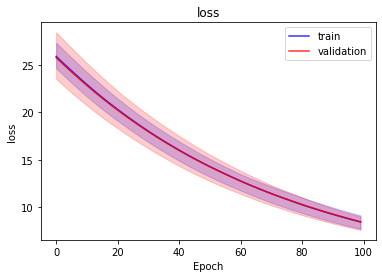

<b>domain_BrayCurtis</b>: 0.5397 (min: 0.5018, max: 0.6201)

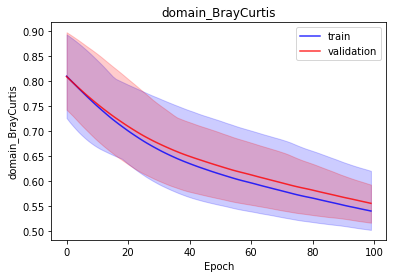

<b>domain_pearson_corr</b>: 0.4260 (min: 0.2690, max: 0.5391)

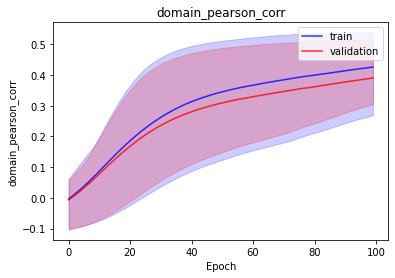

<b>domain_jensen_shannon_divergence</b>: 1.5348 (min: 1.1986, max: 1.7885)

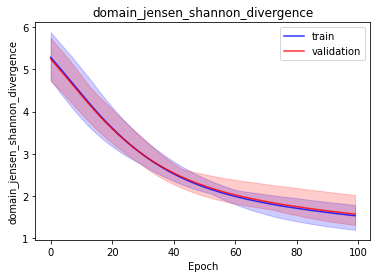

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 8.453531298267466 | 7.728710893271626 | 9.145071955694668 |
| domain_BrayCurtis | 0.5396564602851868 | 0.5018326640129089 | 0.6200882792472839 |
| domain_pearson_corr | 0.42603278160095215 | 0.2689535617828369 | 0.5391090512275696 |
| domain_jensen_shannon_divergence | 1.5347858667373657 | 1.1986215114593506 | 1.7885353565216064 |


[('best_lost_epoch', 99),
 ('val_loss', [8.47763032913208, 7.618462085723877, 9.03742790222168]),
 ('val_domain_BrayCurtis', [0.55502564, 0.5162158, 0.5924601]),
 ('val_domain_pearson_corr', [0.39072588, 0.3046826, 0.5172075]),
 ('val_domain_jensen_shannon_divergence', [1.5722286, 1.3161994, 2.028557])]

In [13]:
print_results(results)

In [14]:
predictions = test_model(modelsLR, CenterLogRatio, None, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_linear_regresion.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.5630236268043518 | 0.5142136216163635 | 0.6321916580200195 |
| pearson_corr | 0.4098401665687561 | 0.2924513518810272 | 0.47393614053726196 |
| jensen_shannon_divergence | 1.7098426818847656 | 1.486236810684204 | 1.8773882389068604 |


# 2. MLP (Dense) <a name="MLP"></a>

In [15]:
def model(shape_in, shape_out, output_transform, layers_list, activation_fn):
    in_layer = layers.Input(shape=(shape_in,))
    net = in_layer
    for s in layers_list:
        net = layers.Dense(s, activation=activation_fn)(net)
    net = layers.Dense(shape_out, activation='linear')(net)
    if output_transform is not None:
        net = output_transform(net)
    out_layer = net
    
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    return model

def compile_model(model, optimizer, reconstruction_error, input_transform, output_transform):
    metrics = get_experiment_metrics(input_transform, output_transform)[0][3:]
    model.compile(optimizer=optimizer, loss=reconstruction_error, metrics=metrics)

In [16]:
def model_fn():
    m = model(shape_in=data_domain_transfer_learning_train.shape[1],
              shape_out=data_microbioma_transfer_learning_train.shape[1],
              output_transform=None,
              layers_list=[128,512],
              activation_fn='tanh')
    
    compile_model(model=m,
                  optimizer=optimizers.Adam(lr=0.01),
                  reconstruction_error=LossMeanSquaredErrorWrapper(CenterLogRatio(), None),
                  input_transform=CenterLogRatio(),
                  output_transform=None)
    return m, None, m, None

In [17]:
latent_space=0
results, modelsMLP = train(model_fn,
                        data_microbioma_transfer_learning_train,
                        data_domain_transfer_learning_train,
                        latent_space=latent_space,
                        folds=5,
                        epochs=100,
                        batch_size=64,
                        learning_rate_scheduler=None,
                        verbose=-1)

<p>Best iteration: <b>80</b></p>

<b>loss</b>: 2.7393 (min: 2.5236, max: 2.8394)

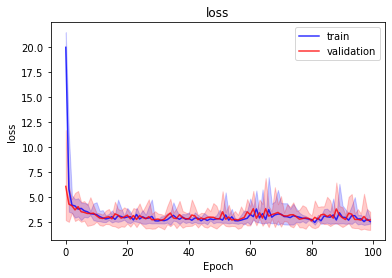

<b>domain_BrayCurtis</b>: 0.3858 (min: 0.3384, max: 0.4292)

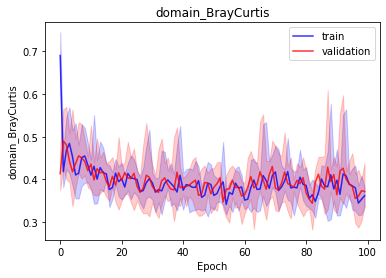

<b>domain_pearson_corr</b>: 0.6431 (min: 0.5548, max: 0.7292)

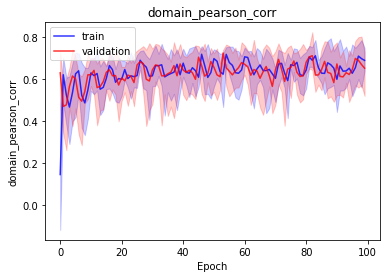

<b>domain_jensen_shannon_divergence</b>: 0.8800 (min: 0.8067, max: 0.9637)

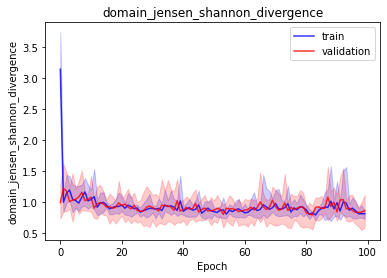

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 2.739319843414596 | 2.5235734815182895 | 2.839388669400975 |
| domain_BrayCurtis | 0.38582462072372437 | 0.33837074041366577 | 0.42916178703308105 |
| domain_pearson_corr | 0.6430990099906921 | 0.5547723770141602 | 0.7291646599769592 |
| domain_jensen_shannon_divergence | 0.8799868822097778 | 0.806702733039856 | 0.9636931419372559 |


[('best_lost_epoch', 80),
 ('val_loss', [2.610770654678345, 1.9755024909973145, 3.137317419052124]),
 ('val_domain_BrayCurtis', [0.36801916, 0.32658535, 0.42249084]),
 ('val_domain_pearson_corr', [0.6805415, 0.62508875, 0.73859435]),
 ('val_domain_jensen_shannon_divergence', [0.8322794, 0.6068897, 0.92389256])]

In [18]:
print_results(results)

In [19]:
predictions = test_model(modelsMLP, CenterLogRatio, None, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.3989211916923523 | 0.3699454963207245 | 0.4361845552921295 |
| pearson_corr | 0.6191924810409546 | 0.5475677847862244 | 0.6712782979011536 |
| jensen_shannon_divergence | 1.1234261989593506 | 1.0760059356689453 | 1.205377221107483 |


# 3. Auto-encoder combined latent subset features <a name="AE_combined_subsetFeatures"></a>

### Get numpy train objects

In [20]:
data_microbioma_train = df_microbioma_train.to_numpy(dtype=np.float32)
data_domain_train = df_domain_train.to_numpy(dtype=np.float32)

In [21]:
print(data_microbioma_train.shape)
data_domain_train.shape

(4251, 45)


(4251, 3)

### To create auto-encoder combined model

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossBrayCurtis |
| Latent Space | 10 |
| Bioma Autoencoder | b -> 512 -> 256 -> 10 -> 256 -> 512 -> b |
| Domain Autoencoder | d -> 32 -> 16 -> 10 -> 256 -> 512 -> b |
| Activation Encoder | tanh |
| Activation Decoder | tanh |
| Activation Latent | tanh |
| CV folds | 0 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


<p>Best iteration: <b>80</b></p>

<b>loss</b>: 0.3669 (min: 0.3669, max: 0.3669)

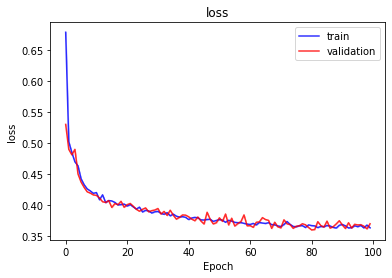

<b>bioma_loss</b>: 0.0858 (min: 0.0858, max: 0.0858)

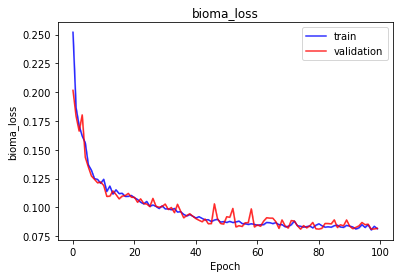

<b>domain_loss</b>: 0.2636 (min: 0.2636, max: 0.2636)

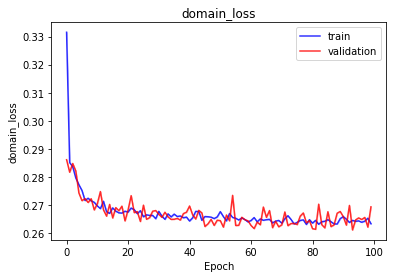

<b>latent_loss</b>: 0.0177 (min: 0.0177, max: 0.0177)

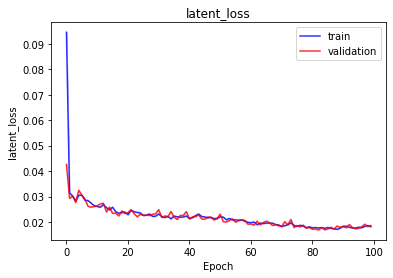

<b>bioma_mse</b>: 0.0001 (min: 0.0001, max: 0.0001)

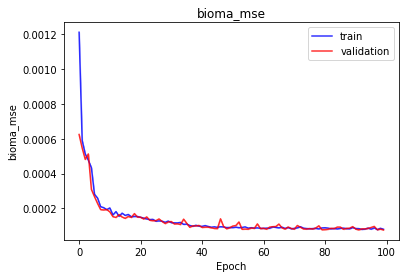

<b>bioma_mae</b>: 0.0037 (min: 0.0037, max: 0.0037)

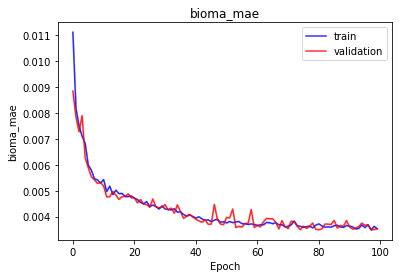

<b>bioma_mape</b>: 20587.8555 (min: 20587.8555, max: 20587.8555)

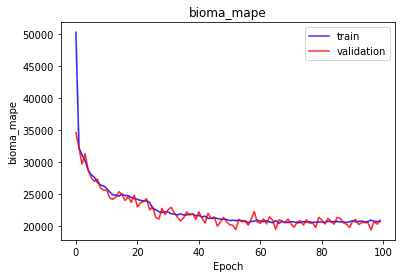

<b>bioma_BrayCurtis</b>: 0.0858 (min: 0.0858, max: 0.0858)

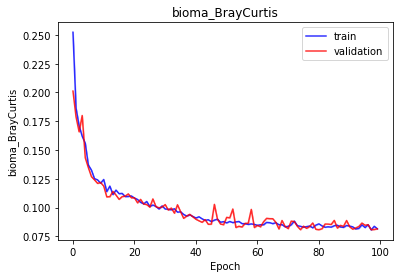

<b>bioma_pearson_corr</b>: 0.9833 (min: 0.9833, max: 0.9833)

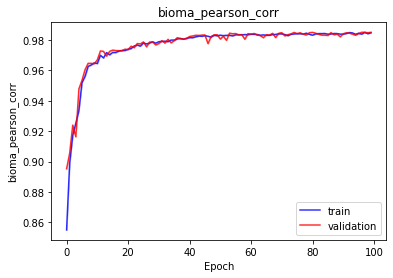

<b>bioma_jensen_shannon_divergence</b>: 0.0898 (min: 0.0898, max: 0.0898)

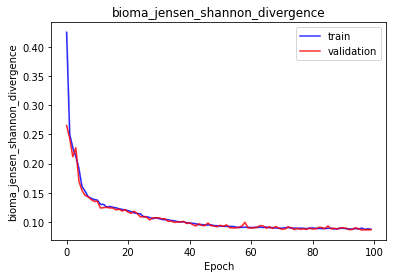

<b>domain_mse</b>: 0.0018 (min: 0.0018, max: 0.0018)

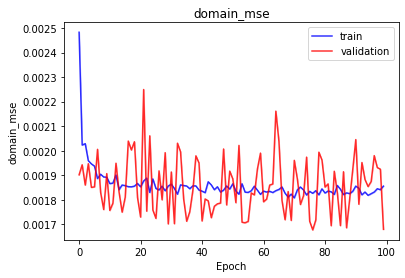

<b>domain_mae</b>: 0.0116 (min: 0.0116, max: 0.0116)

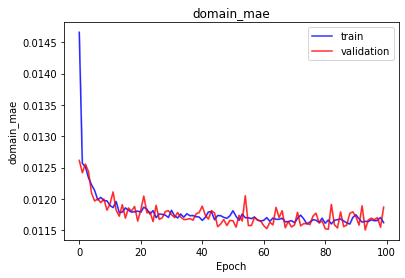

<b>domain_mape</b>: 31736.5703 (min: 31736.5703, max: 31736.5703)

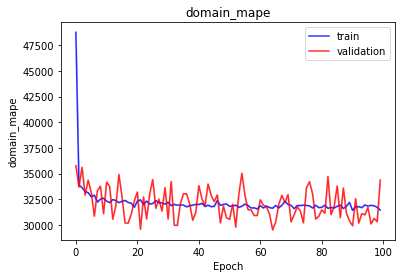

<b>domain_BrayCurtis</b>: 0.2634 (min: 0.2634, max: 0.2634)

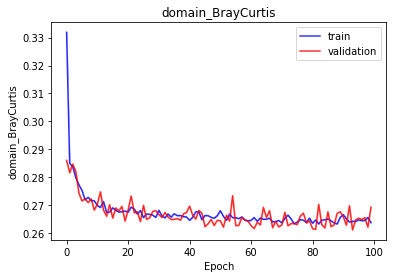

<b>domain_pearson_corr</b>: 0.8659 (min: 0.8659, max: 0.8659)

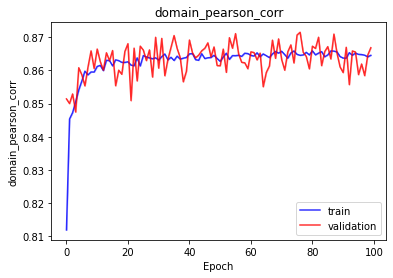

<b>domain_jensen_shannon_divergence</b>: 0.3495 (min: 0.3495, max: 0.3495)

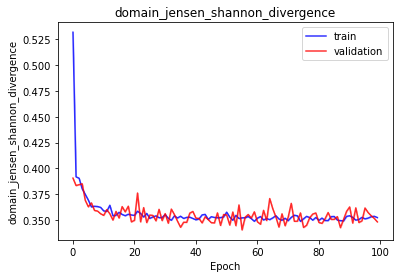

<b>latent_mae</b>: 0.0177 (min: 0.0177, max: 0.0177)

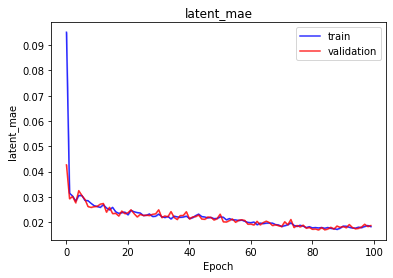

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.3669295673845965 | 0.3669295673845965 | 0.3669295673845965 |
| bioma_loss | 0.0857713371515274 | 0.0857713371515274 | 0.0857713371515274 |
| domain_loss | 0.2636227607727051 | 0.2636227607727051 | 0.2636227607727051 |
| latent_loss | 0.017739001661539078 | 0.017739001661539078 | 0.017739001661539078 |
| bioma_mse | 8.879891538526863e-05 | 8.879891538526863e-05 | 8.879891538526863e-05 |
| bioma_mae | 0.0037196301855146885 | 0.0037196301855146885 | 0.0037196301855146885 |
| bioma_mape | 20587.85546875 | 20587.85546875 | 20587.85546875 |
| bioma_BrayCurtis | 0.08580672740936279 | 0.08580672740936279 | 0.08580672740936279 |
| bioma_pearson_corr | 0.9832658767700195 | 0.9832658767700195 | 0.9832658767700195 |
| bioma_jensen_shannon_divergence | 0.08978286385536194 | 0.08978286385536194 | 0.08978286385536194 |
| domain_mse | 0.0018275907495990396 | 0.0018275907495990396 | 0.0018275907495990396 |
| domain_mae | 0.011612538248300552 | 0.011612538248300552 | 0.011612538248300552 |
| domain_mape | 31736.5703125 | 31736.5703125 | 31736.5703125 |
| domain_BrayCurtis | 0.2633932828903198 | 0.2633932828903198 | 0.2633932828903198 |
| domain_pearson_corr | 0.8659078478813171 | 0.8659078478813171 | 0.8659078478813171 |
| domain_jensen_shannon_divergence | 0.3495081663131714 | 0.3495081663131714 | 0.3495081663131714 |
| latent_mae | 0.017729606479406357 | 0.017729606479406357 | 0.017729606479406357 |


*************

In [22]:
# Train the selected model (the best one from those with the smallest latent space (10)): no.351
experiment_metrics, models, results = perform_experiment_2(cv_folds=0, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=10, 
                        layers=[512,256],
                        activation='tanh', 
                        activation_latent='tanh', 
                        data_microbioma_train=data_microbioma_train,
                        data_domain_train=data_domain_train,
                        show_results=True, 
                        device='/CPU:0')

### To get encoders and decoders to use in transfer learning model

In [23]:
model, encoder, encoder_domain, decoder = models[0]

### To predict latent space for samples in transfer learning Walters et al. subset

In [24]:
latent_transfer_learning_train = encoder.predict(data_microbioma_transfer_learning_train)
latent_transfer_learning_test = encoder.predict(data_microbioma_transfer_learning_test)

### To build model to predict latent space 
Dense model, with transfer_learning_train. With input=domain, output=10 neurons latent space

In [25]:
def model_fn_tl():
    in_layer = layers.Input(shape=(data_domain_transfer_learning_train.shape[1],))
    net = layers.Dense(128, activation='tanh')(in_layer)
    net = layers.Dense(32, activation='tanh')(net)
    out_layer = layers.Dense(latent_transfer_learning_train.shape[1], activation=None)(net) # 'tanh already'
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    model.compile(optimizer=optimizers.Adam(lr=0.01), loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [26]:
result_tl, model_tl = train_tl_noEnsemble(model_fn_tl,
                            latent_transfer_learning_train,
                            latent_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            epochs=100,
                            batch_size=16,
                            verbose=-1)
#print_results(result_tl)
#print(result_tl)

In [27]:
# Test only Dense(domain->latent)
predictions = test_model_tl_latent(model_tl, latent_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP_domain-latent_test.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| mse | 0.0023813892621546984 | 3.197442310920451e-12 | 0.09192898124456406 |


### a) Domain -> latent -> microbiome. Test set TL

In [28]:
predictions = test_model_tl_noEnsemble(model_tl, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.5941896438598633 | 0.5941896438598633 | 0.5941896438598633 |
| pearson_corr | 0.4009837806224823 | 0.4009837806224823 | 0.4009837806224823 |
| jensen_shannon_divergence | 2.391122579574585 | 2.391122579574585 | 2.391122579574585 |


# 4. Auto-encoder OTU latent <a name="AE_latentOTU"></a>

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossBrayCurtis |
| Latent Space | 10 |
| Bioma Autoencoder | b -> 512 -> 256 -> 10 -> 256 -> 512 -> b |
| Domain Autoencoder |   |
| Activation Encoder | tanh |
| Activation Decoder | tanh |
| Activation Latent | tanh |
| CV folds | 0 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


<p>Best iteration: <b>76</b></p>

<b>loss</b>: 0.0572 (min: 0.0572, max: 0.0572)

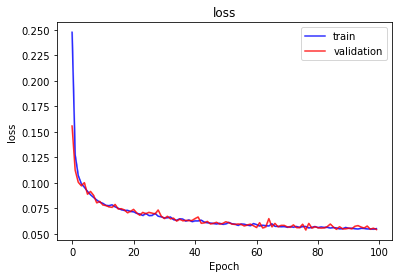

<b>bioma_mse</b>: 0.0000 (min: 0.0000, max: 0.0000)

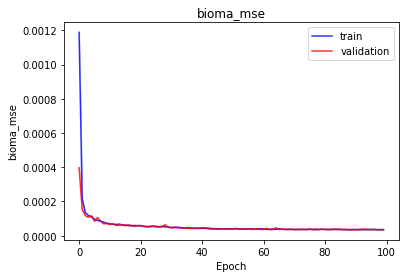

<b>bioma_mae</b>: 0.0024 (min: 0.0024, max: 0.0024)

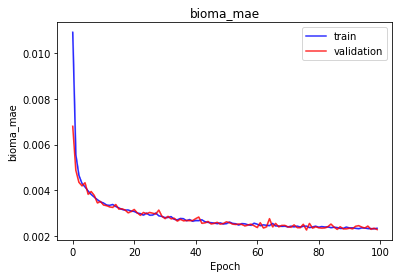

<b>bioma_mape</b>: 18822.0273 (min: 18822.0273, max: 18822.0273)

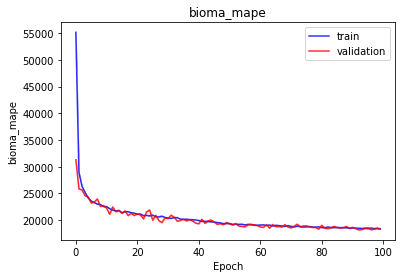

<b>bioma_BrayCurtis</b>: 0.0572 (min: 0.0572, max: 0.0572)

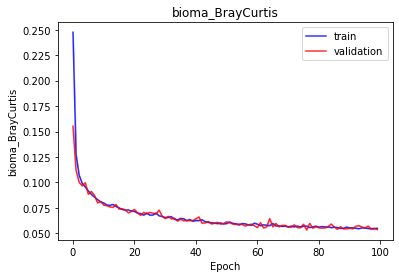

<b>bioma_pearson_corr</b>: 0.9901 (min: 0.9901, max: 0.9901)

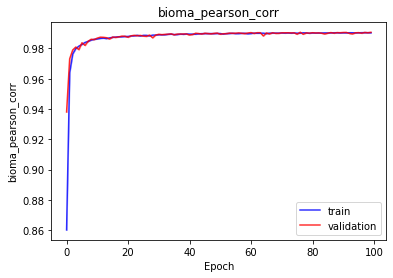

<b>bioma_jensen_shannon_divergence</b>: 0.0698 (min: 0.0698, max: 0.0698)

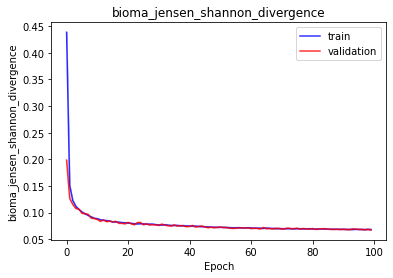

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.057169455072685456 | 0.057169455072685456 | 0.057169455072685456 |
| bioma_mse | 3.799890691880137e-05 | 3.799890691880137e-05 | 3.799890691880137e-05 |
| bioma_mae | 0.00244683469645679 | 0.00244683469645679 | 0.00244683469645679 |
| bioma_mape | 18822.02734375 | 18822.02734375 | 18822.02734375 |
| bioma_BrayCurtis | 0.05716945230960846 | 0.05716945230960846 | 0.05716945230960846 |
| bioma_pearson_corr | 0.9900619387626648 | 0.9900619387626648 | 0.9900619387626648 |
| bioma_jensen_shannon_divergence | 0.06982003897428513 | 0.06982003897428513 | 0.06982003897428513 |


*************

In [29]:
# Train the selected model (the best one from those with the smallest latent space (10)): no.351
experiment_metrics, models, results = perform_experiment_2(cv_folds=0, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=10, 
                        layers=[512,256],
                        activation='tanh', 
                        activation_latent='tanh', 
                        data_microbioma_train=data_microbioma_train,
                        data_domain_train=None,
                        show_results=True, 
                        device='/CPU:0')

### To get encoders and decoders to use in transfer learning model

In [30]:
model, encoder, _, decoder = models[0]

In [31]:
#encoder = tf.keras.models.load_model('encoder_biome.h5')
#decoder = tf.keras.models.load_model('decoder.h5')

### To predict latent space for samples in transfer learning Walters et al. subset

In [32]:
latent_transfer_learning_train = encoder.predict(data_microbioma_transfer_learning_train)
latent_transfer_learning_test = encoder.predict(data_microbioma_transfer_learning_test)

In [33]:
#print(latent_transfer_learning_test)
with np.printoptions(precision=3, suppress=True):
    #print(latent_transfer_learning_train.min())
    #print(latent_transfer_learning_train.max())
    print(latent_transfer_learning_train.mean(axis=0))
    #print(latent_transfer_learning_test.min())
    #print(latent_transfer_learning_test.max())    
    print(latent_transfer_learning_test.mean(axis=0))

[-0.677 -0.546 -0.821  0.609  0.818 -0.554  0.816 -0.627 -0.413 -0.518]
[-0.677 -0.521 -0.812  0.571  0.838 -0.571  0.791 -0.675 -0.347 -0.51 ]


In [34]:
#decoder = tf.keras.models.load_model('decoder.h5')

In [35]:
latent_transfer_learning_train.shape[1]

10

### To build model to predict latent space 

In [36]:
def model_fn_tl():
    in_layer = layers.Input(shape=(data_domain_transfer_learning_train.shape[1],))  
    net = layers.Dense(64, activation='tanh')(in_layer)
    net = layers.Dense(32, activation='tanh')(net)
    net = layers.Dense(16, activation='tanh')(net)  
    out_layer = layers.Dense(latent_transfer_learning_train.shape[1], activation=None)(net) # 'tanh already'
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    model.compile(optimizer=optimizers.Adam(lr=0.01), loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [37]:
result_tl, model_tl = train_tl_noEnsemble(model_fn_tl,
                            latent_transfer_learning_train,
                            latent_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            epochs=100,
                            batch_size=16,
                            verbose=-1)
#print_results(result_tl)
print(result_tl)

In [38]:
print_results_noEnsemble(result_tl)

<p>Best iteration: <b>98</b></p>

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.023479702582604497 | 0.01813953088293242 | 0.2177963584314945 |
| domain_mean_squared_error | 0.023479698225855827 | 0.01813952997326851 | 0.21779634058475494 |


In [39]:
# Test only Dense(domain->latent)
predictions = test_model_tl_latent(model_tl, latent_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP_domain-latent_test.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| mse | 0.03143781051039696 | 3.174037388475881e-08 | 1.8788220882415771 |


### Domain -> latent -> microbiome. Test set TL

In [40]:
predictions = test_model_tl_noEnsemble(model_tl, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.5693838000297546 | 0.5693838000297546 | 0.5693838000297546 |
| pearson_corr | 0.4073158800601959 | 0.4073158800601959 | 0.4073158800601959 |
| jensen_shannon_divergence | 2.7567145824432373 | 2.7567145824432373 | 2.7567145824432373 |


## Predictions

In [43]:
# Absolute abundance transformed to TSS (with epsilon=1E-6)
def transform_to_rel_abundance(dataset):
    epsilon=1E-6
    sum_per_sample = dataset.sum(axis=1)
    num_samples = sum_per_sample.shape
    num_OTUs = np.shape(dataset)[-1] 
    sum_per_sample = sum_per_sample + (num_OTUs * epsilon)
    dividend=dataset+epsilon
    dataset_rel_abund = np.divide(dividend,sum_per_sample[:,None])
    #display(Markdown("{}</p>".format(np.array2string(actual_array,precision=6,floatmode='fixed'))))
    #actual_array.sum(axis=1)
    return dataset_rel_abund

##### Run prediction test set from domain (i.e. environmental features)

In [99]:
pred_latent = model_tl.predict(data_domain_transfer_learning_test)
pred_domain = decoder.predict(pred_latent)

##### Filter out OTUs not in Maarastawi2018 dataset

In [107]:
otu_sum_df = df_microbioma_transfer_learning_test.sum(axis=0)
otus_zero_index = otu_sum_df[otu_sum_df == 0].index
otus_zero = [df_microbioma_transfer_learning_test.columns.get_loc(c) for c in otus_zero_index if c in df_microbioma_transfer_learning_test]

In [108]:
df_microbioma_transfer_learning_test_noZeros = df_microbioma_transfer_learning_test.drop(otus_zero_index,axis=1)
data_microbioma_transfer_learning_test_noZeros = df_microbioma_transfer_learning_test_noZeros.to_numpy(dtype=np.float32)

In [109]:
pred_domain_common_otus = np.delete(pred_domain, otus_zero, 1)

##### Original relative abundances test set, to compare with predictions

In [110]:
actual_common_otus = transform_to_rel_abundance(data_microbioma_transfer_learning_test_noZeros)

#### Pearson correlation

In [46]:
def compute_pearson_Nsamples(actual,pred_domain):
    tot = 0.0
    count = 0
    for i, (act,pred) in enumerate(zip(actual,pred_domain)):
        r, _ = scipy.stats.pearsonr(act,pred)
        if not np.isnan(r):
            count += 1
            tot += r
    r_final = tot/count
    return r_final

In [111]:
compute_pearson_Nsamples(actual_common_otus,pred_domain_common_otus)

0.5487826637745759

#### Bray-Curtis

In [50]:
from skbio.diversity import beta_diversity
def compute_braycurtis_Nsamples(actual,pred_domain):
    tot_bc = 0.0
    for i, (act,pred) in enumerate(zip(actual,pred_domain)):
        bc_dm = beta_diversity("braycurtis", [act,pred]) # Source: http://scikit-bio.org/docs/0.4.2/diversity.html
        bc = bc_dm[0,1]
        tot_bc += bc
    bc_final = tot_bc/(pred_domain.shape[0])
    return bc_final

In [112]:
compute_braycurtis_Nsamples(actual_common_otus,pred_domain_common_otus)

0.4294679586132337